In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadOneFileUproot
dir_map = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_0.root",
                            name_branch="evtTruth", return_list=False)
dir_AP = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/root/TagAfterPulse_0.root",
                            name_branch="AfterPulseTag", return_list=False)

In [3]:
dir_PSD = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root/user_PSD_0_SN.root",
                           name_branch="PSD", return_list=False)

In [4]:
import pandas as pd
df_AP = pd.DataFrame.from_dict(dir_AP)
df_map = pd.DataFrame.from_dict(dir_map)
df_PSD = pd.DataFrame.from_dict(dir_PSD)
df_PSD = df_PSD.rename({"evtType":"TagPSD"},axis=1)
df_map = pd.concat( (df_map, df_AP, df_PSD),axis=1)
df_map

,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,ratioAP,...,fileNo,detID,entryCalib,entryGen,TotalCharge_lastEvt,TriggerTimeIntervalWithFilter,TotalCharge,TagAP,psdVal,TagPSD
0,0,19.983615,pES,0.212583,-4925.322266,-2619.566650,3983.017334,0.319780,0.671429,0.003297,...,0,6,0,6,0.000000,1000.000,744.910091,0,4.332481e-03,2
1,1,72.964650,N12,63.653191,-6283.850098,12852.231445,-4924.565430,0.981472,0.005437,0.013063,...,0,7,1,7,0.000000,1000.000,113116.718872,0,9.998755e-01,1
2,2,72.964650,AfterPulse,0.482681,139.278885,-23.865454,568.739075,0.028527,0.382421,0.582113,...,0,7,2,7,113116.718872,1.095,1045.376907,1,5.603862e-03,2
3,3,0.000000,AfterPulse,0.311441,81.301765,-534.210999,12.567459,0.000000,0.280500,0.714500,...,0,-1,3,7,113116.718872,3.235,499.848627,1,7.416920e-07,2
4,4,12.503522,IBDp,13.340494,4992.425293,10178.103516,4714.770996,0.961626,0.025472,0.012760,...,0,13,4,13,0.000000,1000.000,22466.255727,0,9.968648e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,18663,20.753764,pES,0.188194,6186.286621,2394.746094,12541.400391,0.338235,0.652715,0.004525,...,28,91,103,14091,0.000000,1000.000,706.928918,0,1.275571e-03,2
18664,18664,13.158622,IBDp,13.805496,-7299.820801,4423.094727,-8364.102539,0.961896,0.024873,0.013044,...,28,92,104,14092,0.000000,1000.000,22716.439760,0,9.985903e-01,1
18665,18665,13.158622,IBDd,2.495589,-7529.791504,4455.890137,-8275.335938,0.859468,0.127006,0.012150,...,28,92,105,14092,0.000000,1000.000,4500.187693,0,9.971751e-01,1
18666,18666,17.317196,IBDp,18.530066,5044.806152,14350.795898,3421.122070,0.968430,0.018737,0.012801,...,28,93,106,14093,0.000000,1000.000,33086.969728,0,9.998966e-01,1


# Check Trigger Time Order

[]

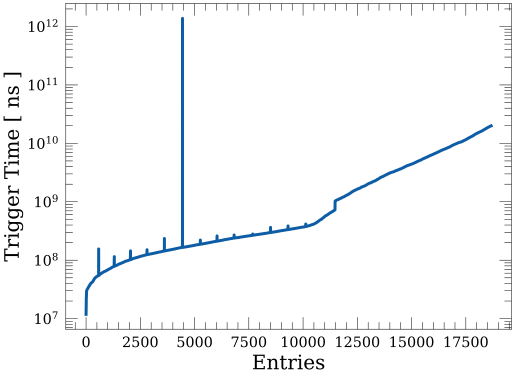

In [13]:
plt.plot(df_map["TriggerTime"])
plt.ylabel("Trigger Time [ ns ]")
plt.xlabel("Entries")
plt.semilogy()

In [31]:
for i in range(5):
    index = np.where( df_map["TriggerTime"].diff() <0 )[0][i]
    display(df_map[["evtType","TriggerTime"]][index-10:index+5])

# plt.ylabel("Trigger Time [ ns ]")
# plt.xlabel("Entries")
# plt.semilogy()

,evtType,TriggerTime
572,IBDp,54660594.0
573,AfterPulse,54661666.0
574,IBDd,54799540.0
575,IBDd,54813514.0
576,IBDd,55061532.0
577,B12,57456023.0
578,N12,59916946.0
579,B12,81169397.0
580,N12,101735587.0
581,N12,155688484.0


,evtType,TriggerTime
1293,IBDd,78895000.0
1294,N12,82913423.0
1295,N12,84035108.0
1296,B12,84341287.0
1297,N12,85674457.0
1298,N12,86113329.0
1299,B12,88525974.0
1300,B12,98109618.0
1301,B12,112048819.0
1302,N12,115013199.0


,evtType,TriggerTime
2040,IBDd,102114358.0
2041,pES,102135781.0
2042,N12,105051954.0
2043,N12,113685014.0
2044,B12,119064784.0
2045,B12,122748971.0
2046,N12,127450663.0
2047,B12,133483683.0
2048,B12,141746004.0
2049,B12,144437489.0


,evtType,TriggerTime
2801,IBDd,124334719.0
2802,IBDd,124388182.0
2803,IBDd,124488033.0
2804,B12,129032574.0
2805,N12,129857466.0
2806,N12,134379545.0
2807,N12,136190530.0
2808,N12,136243750.0
2809,N12,146275304.0
2810,N12,150973240.0


,evtType,TriggerTime
3602,IBDd,143934717.0
3603,N12,144044408.0
3604,N12,146060854.0
3605,B12,147732484.0
3606,B12,156955456.0
3607,N12,157137056.0
3608,N12,159605405.0
3609,N12,173963519.0
3610,B12,199036352.0
3611,B12,235289095.0


### Load Selection Parameters

In [5]:
def GetMinAndMax(df, key):
    return ( df.loc[key]['min'], df.loc[key]['max'] )
df_parameters = pd.read_xml("/afs/ihep.ac.cn/users/j/junotemp006/junotemp006/myproject/SNSpecUnfold/channelClass/SNPSD/myJob/configFiles/IBD_select/scan_0_0.xml",
                xpath="//condition").set_index("name")

# t_cut = 2e6 # ns
# Ed_cut = (2.1, 2.7) # MeV
# Ep_cut = 1.7 # MeV
# dR_cut = 1.5e3 # mm

dR_cut = GetMinAndMax(df_parameters, "distance") # mm
t_cut =  GetMinAndMax(df_parameters, "deltaT") # ns
Ed_cut = GetMinAndMax(df_parameters, "denergy")
Ep_cut = GetMinAndMax(df_parameters, "penergy")

print(dR_cut, t_cut, Ed_cut, Ep_cut)
df_parameters

(0.0, 1000.0) (0.0, 1000000.0) (2.1, 2.7) (0.7, nan)


,min,max
name,,
denergy,2.1,2.7
penergy,0.7,NaN
distance,0.0,1000.0
deltaT,0.0,1000000.0


In [6]:
import tqdm


# Filter AfterPulse Events
df_map_with_filter = df_map[(df_map["TagAP"]==0) & (df_map["TagPSD"]==1)].reset_index()


v_IBDp_tag = np.ones(len(df_map_with_filter))*-1
v_IBDd_tag = np.zeros(len(df_map_with_filter))

for index, row in tqdm.tqdm( df_map_with_filter.iterrows() ):
    if row["recE"]< Ep_cut[0] or v_IBDd_tag[index]==1:
        v_IBDp_tag[index] = 0
        continue

    index_time = (df_map_with_filter["TriggerTime"]-row["TriggerTime"]>t_cut[0]) & (df_map_with_filter["TriggerTime"]-row["TriggerTime"]<t_cut[1])
    index_E_delay = ( (df_map_with_filter["recE"]<Ed_cut[1]) & (df_map_with_filter["recE"]>Ed_cut[0]) )
    dR = np.sqrt( (df_map_with_filter["recX"]-row["recX"])**2 + (df_map_with_filter["recY"]-row["recY"])**2 + (df_map_with_filter["recZ"]-row["recZ"])**2 )
    index_dR =  (dR < dR_cut[1]) & (dR>dR_cut[0])
    index_residual_delay_evt = (v_IBDd_tag!=1)

    index_delay_signal = (index_time & index_E_delay & index_dR & index_residual_delay_evt)

    if any(index_delay_signal):
        v_IBDp_tag[index] = 1
        v_IBDd_tag[np.where(index_delay_signal)[0][0]] = 1
    else:
        v_IBDp_tag[index] = 0

    # if index>2000:
    #     break

df_map_with_filter["IBDd_tag"] = np.array( v_IBDd_tag, dtype=np.int32 )
df_map_with_filter["IBDp_tag"] = np.array( v_IBDp_tag, dtype=np.int32 )

df_map_with_filter

14353it [00:36, 396.69it/s]


,index,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,...,entryCalib,entryGen,TotalCharge_lastEvt,TriggerTimeIntervalWithFilter,TotalCharge,TagAP,psdVal,TagPSD,IBDd_tag,IBDp_tag
0,1,1,72.964650,N12,63.653191,-6283.850098,12852.231445,-4924.565430,0.981472,0.005437,...,1,7,0.0,1000.0,113116.718872,0,0.999876,1,0,0
1,4,4,12.503522,IBDp,13.340494,4992.425293,10178.103516,4714.770996,0.961626,0.025472,...,4,13,0.0,1000.0,22466.255727,0,0.996865,1,0,1
2,5,5,12.503522,IBDd,2.382323,4835.650391,10872.837891,4593.922852,0.851955,0.133472,...,5,13,0.0,1000.0,4416.770675,0,0.997891,1,1,0
3,6,6,35.564467,C12,17.160961,-2723.495850,-2786.581299,2033.689087,0.963161,0.024505,...,6,14,0.0,1000.0,25990.499633,0,0.989000,1,0,0
4,7,7,72.964650,N12,14.232147,-6500.200195,12987.520508,-5098.969238,0.964754,0.022265,...,7,7,0.0,1000.0,25247.555372,0,0.999978,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14348,18662,18662,14.304140,IBDd,2.375975,9933.866211,-11663.757812,-4231.927246,0.857556,0.130667,...,102,14088,0.0,1000.0,4555.960643,0,0.997819,1,1,0
14349,18664,18664,13.158622,IBDp,13.805496,-7299.820801,4423.094727,-8364.102539,0.961896,0.024873,...,104,14092,0.0,1000.0,22716.439760,0,0.998590,1,0,1
14350,18665,18665,13.158622,IBDd,2.495589,-7529.791504,4455.890137,-8275.335938,0.859468,0.127006,...,105,14092,0.0,1000.0,4500.187693,0,0.997175,1,1,0
14351,18666,18666,17.317196,IBDp,18.530066,5044.806152,14350.795898,3421.122070,0.968430,0.018737,...,106,14093,0.0,1000.0,33086.969728,0,0.999897,1,0,0


In [7]:
df_map_with_IBDTag = pd.concat( (df_map, df_map_with_filter.set_index("evtID")["IBDp_tag"], df_map_with_filter.set_index("evtID")["IBDd_tag"]), axis=1 ).fillna(0)
df_map_with_IBDTag

,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,ratioAP,...,entryCalib,entryGen,TotalCharge_lastEvt,TriggerTimeIntervalWithFilter,TotalCharge,TagAP,psdVal,TagPSD,IBDp_tag,IBDd_tag
0,0,19.983615,pES,0.212583,-4925.322266,-2619.566650,3983.017334,0.319780,0.671429,0.003297,...,0,6,0.000000,1000.000,744.910091,0,4.332481e-03,2,0.0,0.0
1,1,72.964650,N12,63.653191,-6283.850098,12852.231445,-4924.565430,0.981472,0.005437,0.013063,...,1,7,0.000000,1000.000,113116.718872,0,9.998755e-01,1,0.0,0.0
2,2,72.964650,AfterPulse,0.482681,139.278885,-23.865454,568.739075,0.028527,0.382421,0.582113,...,2,7,113116.718872,1.095,1045.376907,1,5.603862e-03,2,0.0,0.0
3,3,0.000000,AfterPulse,0.311441,81.301765,-534.210999,12.567459,0.000000,0.280500,0.714500,...,3,7,113116.718872,3.235,499.848627,1,7.416920e-07,2,0.0,0.0
4,4,12.503522,IBDp,13.340494,4992.425293,10178.103516,4714.770996,0.961626,0.025472,0.012760,...,4,13,0.000000,1000.000,22466.255727,0,9.968648e-01,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,18663,20.753764,pES,0.188194,6186.286621,2394.746094,12541.400391,0.338235,0.652715,0.004525,...,103,14091,0.000000,1000.000,706.928918,0,1.275571e-03,2,0.0,0.0
18664,18664,13.158622,IBDp,13.805496,-7299.820801,4423.094727,-8364.102539,0.961896,0.024873,0.013044,...,104,14092,0.000000,1000.000,22716.439760,0,9.985903e-01,1,1.0,0.0
18665,18665,13.158622,IBDd,2.495589,-7529.791504,4455.890137,-8275.335938,0.859468,0.127006,0.012150,...,105,14092,0.000000,1000.000,4500.187693,0,9.971751e-01,1,0.0,1.0
18666,18666,17.317196,IBDp,18.530066,5044.806152,14350.795898,3421.122070,0.968430,0.018737,0.012801,...,106,14093,0.000000,1000.000,33086.969728,0,9.998966e-01,1,0.0,0.0


In [8]:
from IPython.display import display
df_map_IBDp_gf = df_map_with_IBDTag.groupby(["IBDp_tag","evtType"]).size()
df_map_IBDd_gf = df_map_with_IBDTag.groupby(["IBDd_tag","evtType"]).size()

df_map_total = df_map_with_IBDTag.groupby("evtType").size()

print("IBD Prompt Signal Selection Efficiency:\t",  df_map_IBDp_gf.xs(1, level="IBDp_tag").loc["IBDp"]/df_map_total.loc["IBDp"] )
print("IBD Delay  Signal Selection Efficiency:\t",  df_map_IBDd_gf.xs(1, level="IBDd_tag").loc["IBDd"]/df_map_total.loc["IBDd"] )

display( pd.concat( (df_map_with_IBDTag["IBDd_tag"].value_counts(),df_map_with_IBDTag["IBDp_tag"].value_counts()), axis=1)  )


IBD Prompt Signal Selection Efficiency:	 0.8719329742669061
IBD Delay  Signal Selection Efficiency:	 0.8953063090521183


,IBDd_tag,IBDp_tag
0.0,12742,12742
1.0,5926,5926


In [9]:
df_map_with_IBDTag.groupby(["IBDp_tag","IBDd_tag","evtType"]).size()

IBDp_tag  IBDd_tag  evtType   
0.0       0.0       AfterPulse    2348
                    B12            164
                    C12            284
                    IBD             47
                    IBDd           687
                    IBDp           856
                    N12            247
                    eES            273
                    pES           1791
                    pileUp         119
          1.0       IBDd          5875
                    pileUp          51
1.0       0.0       C12              1
                    IBD              3
                    IBDp          5828
                    pileUp          94
dtype: int64

[]

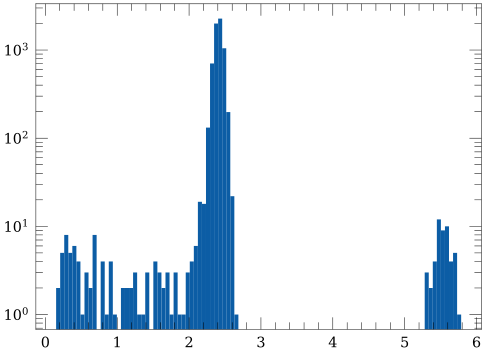

In [10]:
plt.hist(df_map_with_IBDTag["recE"][df_map_with_IBDTag["evtType"]=="IBDd"], bins=100)
plt.semilogy()